# LIVE TWEETS!  
This is going to be very similar to the main project, however, this will let you go through the same thing with your own live tweets! All you have to do is add your own cusumerKey and consumerSecret and you're all good to go!  
You even get to pick your own hashtags to compare!

In [4]:
#First, The Imports
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# Every returned Out[] is displayed, not just the last one. (Thanks NaRae!)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Please insert your consumerKey and comsumerSecret in the cell below:

In [5]:
# the key variables
consumerKey = "Wnb1NHXFj8dJockenbOQtHRs1"
consumerSecret ="B9R7aJwPxK3v5jDWprjBLf4Q6q4WWTI8TXHLjtc2MzHMq48Qas"

In [6]:
#authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#connecting to Twitter API
api = tweepy.API(auth)

### This time around, pick your own hashtags to compare! You'll need 4 (2 related to one topic, and 2 related to another, please enter them in the variables in the cell below:

In [7]:
# topic 1
a = 'sleep'
#topic 1, word 1
a1 = '%23' + 'sleepdeprivation'
#topic 1, word 2
a2 = '%23' + "nap"

#topic 2
b = 'finals'
#topic 2, word 1
b1 = '%23' + "crying"
#topic 2, word 2
b2 = '%23' + "professors"

In [8]:
#getting topic 1 and topic 2 search results
ra1 = api.search(q = a1)
ra2 = api.search(q = a2)
rb1 = api.search(q = b1)
rb2 = api.search(q = b2)

In [9]:
#Get the first 1000 items based on the search query
for tweet in tweepy.Cursor(api.search, q=a1).items(1000):
    ra1.append(tweet)
for tweet in tweepy.Cursor(api.search, q=a2).items(1000):
    ra2.append(tweet)
for tweet in tweepy.Cursor(api.search, q=b1).items(1000):
    rb1.append(tweet)
for tweet in tweepy.Cursor(api.search, q=b2).items(1000):
    rb2.append(tweet)

In [10]:
#Verify the number of items returned
len(ra1)
len(ra2)
len(rb1)
len(rb2)

283

1015

1015

245

### AWESOME! Now, let's take a look at the first tweet form each hashtag and learn a little about them!

In [11]:
#this is an example of a tweet
tweeta1 = ra1[1] #get the data of the first tweet.

#then, print tweet. 
print(tweeta1.text)

#other additional info about the tweet for reference
tweeta1.lang                    #the language of the tweet 
tweeta1.user.screen_name        #this is the username
tweeta1.user.description        #self description of user by user posted on profile
tweeta1.created_at              #date and time tweet was created
tweeta1.id                      #Tweet ID #
tweeta1.favorite_count          #how many likes the tweet received

Sleep Deprivation May Treat Depression. But Would It Ever Be Prescribed? https://t.co/sRTXHfYxUN
#sleepdeprivation #depression #mentalhealth


'en'

'mayfieldmed'

'#Medical & #laboratory #equipment service #repair #depotrepair #labtech #dental #veterinary #medtech #medicaldevice #hospital\n800.667.3570'

datetime.datetime(2017, 11, 28, 20, 40, 5)

935609263678021632

0

In [12]:
#this is an example of a tweet
tweeta2 = ra2[1] #get the data of the first tweet.

#then, print tweet. 
print(tweeta2.text)

#other additional info about the tweet for reference
tweeta2.lang                    #the language of the tweet
tweeta2.user.screen_name        #this is the username
tweeta2.user.description        #self description of user by user posted on profile
tweeta2.created_at              #date and time tweet was created
tweeta2.id                      #Tweet ID #
tweeta2.favorite_count          #how many likes the tweet received

👌🏽Menja els naps ratllats amb unes gotetes de llima i ajuda al teu sistema respiratori. Fes un suc de #nap i… https://t.co/viCkDa0sLZ


'und'

'CamidelHorta'

"Comandes i consultes: info@camidelhorta.com L'Horta de València. Sense intermediaris. Promovent la Salut i l'Estima a la Terra i al Cos. Dissabtes al Mercat!"

datetime.datetime(2017, 11, 28, 21, 35, 53)

935623303632506883

0

In [13]:
#this is an example of a tweet
tweetb1 = rb1[1] #get the data of the first tweet.

#then, print tweet. 
print(tweetb1.text)

#other additional info about the tweet for reference
tweetb1.lang                    #the language of the tweet
tweetb1.user.screen_name        #this is the username
tweetb1.user.description        #self description of user by user posted on profile
tweetb1.created_at              #date and time tweet was created
tweetb1.id                      #Tweet ID #
tweetb1.favorite_count          #how many likes the tweet received

Dennis wise, He's a very small man!!!!! #ImACeleb #crying


'en'

'LewisKevan'

''

datetime.datetime(2017, 11, 28, 21, 41, 28)

935624708057378816

2

In [14]:
#this is an example of a tweet
tweetb2 = rb2[1] #get the data of the first tweet.

#then, print tweet. 
print(tweetb2.text)

#other additional info about the tweet for reference
tweetb2.lang                    #the language of the tweet
tweetb2.user.screen_name        #this is the username
tweetb2.user.description        #self description of user by user posted on profile
tweetb2.created_at              #date and time tweet was created
tweetb2.id                      #Tweet ID #
tweetb2.favorite_count          #how many likes the tweet received

#Professors with #industry experience &amp; small study groups - just two things that distinguish Universities of Appli… https://t.co/5hVRif6HEn


'en'

'UAS7_NY'

'7 German Universities of Applied Sciences leading in teaching & research. Providing study and internship opportunities in Germany to North American students.'

datetime.datetime(2017, 11, 28, 19, 25, 32)

935590499532058624

0

### Sweet! Now let's clean these tweets into a dataframe and get going!

In [16]:
# this is a function found here: http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html
# I am using this to clean my data into a dataframe, it has been altered slightly (mostly deletion) for my project.
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

In [17]:
#Do this funciton on the tweets, then connect the dataframes
a1_df = toDataFrame(ra1)
a2_df = toDataFrame(ra2)
b1_df = toDataFrame(rb1)
b2_df = toDataFrame(rb2)

#Adding a column to say which hashtag it came from
a1_df['Hashtag'] = a1
a2_df['Hashtag'] = a2 
b1_df['Hashtag'] = b1
b2_df['Hashtag'] = b2

# now to combine into 2 larger ones
a_df = pd.concat([a1_df, a2_df])
b_df = pd.concat([b1_df, b2_df])

#Take a look at the new dataframes
a_df.head()
b_df.head()

,tweetID,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userLocation,userTimezone,Hashtag
0,935613424440102924,1,0,Twitter for iPad,2017-11-28 20:56:37,913037741369315328,asleepystudent1,Sleepy Student,,None,%23sleepdeprivation
1,935609263678021632,0,0,Hootsuite,2017-11-28 20:40:05,2655594823,mayfieldmed,Mayfield Medical Svs,"St. Louis, MO",Eastern Time (US & Canada),%23sleepdeprivation
2,935588603442487296,0,1,Twitter Web Client,2017-11-28 19:18:00,784126715035398145,VoiceEclectics,Voice Eclectics,"Hollywood, Los Angeles",None,%23sleepdeprivation
3,935587390181306368,0,1,Twitter for Android,2017-11-28 19:13:10,178039542,JWill_PediACCM,Julie Williamson,"Atlanta, GA",Eastern Time (US & Canada),%23sleepdeprivation
4,935574955638558720,11,0,Twitter for Android,2017-11-28 18:23:46,931573776193654784,MatthewHibber10,Matthew Hibbert,,None,%23sleepdeprivation


,tweetID,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userLocation,userTimezone,Hashtag
0,935626956019773442,0,1,Twitter for iPhone,2017-11-28 21:50:24,3052432903,pknrz,ronnie,MacLaren's Pub,Pacific Time (US & Canada),%23crying
1,935624708057378816,0,2,Twitter for iPhone,2017-11-28 21:41:28,316029115,LewisKevan,lewkev,scarborough!,None,%23crying
2,935622249125679105,0,1,Twitter for iPhone,2017-11-28 21:31:41,92133219,CatrionaSheehan,Catriona Sheehan,Limerick💚& Cork/Fermoy,Hawaii,%23crying
3,935617798751031297,0,0,Twitter for Android,2017-11-28 21:14:00,3438631527,Eternallyvivid,Galy Szentgyorgyi,its pronounced as Gal-ee,None,%23crying
4,935617764495990784,0,1,Twitter for Android,2017-11-28 21:13:52,886553540994375680,AsanaAdams,AsanaAdams,,None,%23crying


In [ ]:
#write your dataframes to a csv file, if you want to be able to use it later.
# Write out the DF as a new CSV file
a_df.to_csv('a_tweets.csv')
b_df.to_csv('b_tweets.csv')

### Now that the data has been cleaned a bit, let's start comparing!  
### Size comparison:

In [18]:
a_df.size
b_df.size

14278

13860

### Number of favorites vs. retweets comparison

In [19]:
a_fav_total = a_df['tweetFavoriteCt'].sum()
a_rt_total = a_df['tweetRetweetCt'].sum()

b_fav_total = b_df['tweetFavoriteCt'].sum()
b_rt_total = b_df['tweetRetweetCt'].sum()

,sleep,finals
Favorites,1830,NaN


,sleep,finals
Retweets,8538,NaN


,sleep,finals
Favorites,1830,2360


,sleep,finals
Retweets,8538,5334


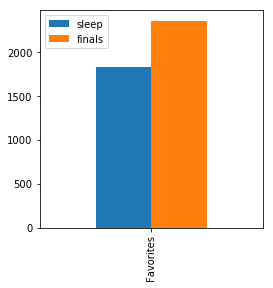

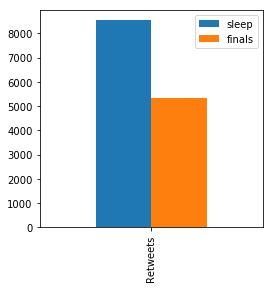

In [20]:
# okay, now for the bar graph, again
fav = pd.DataFrame(columns = [a, b])
rt = pd.DataFrame(columns = [a, b])
fav.set_value('Favorites', a, a_fav_total)
rt.set_value('Retweets', a, a_rt_total)
fav.set_value('Favorites', b, b_fav_total)
rt.set_value('Retweets', b, b_rt_total)

fav.plot.bar(figsize=(4,4))
plt.show()
rt.plot.bar(figsize=(4,4))
plt.show()

43.67541766109785

56.324582338902154

61.548442906574394

38.451557093425606

([<matplotlib.patches.Wedge at 0x11a783c50>,
  <matplotlib.text.Text at 0x11a9a3908>])

(-1.2306095006859297,
 1.1162241883841064,
 -1.1069158865461863,
 1.1210080470849155)

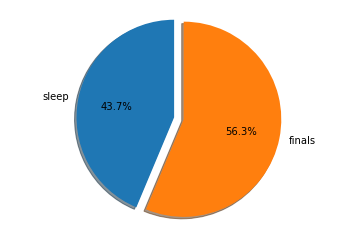

([<matplotlib.patches.Wedge at 0x11a8f9320>,
  <matplotlib.text.Text at 0x11a9e9630>])

(-1.2119670953716286,
 1.125767289512938,
 -1.1474795516327836,
 1.1022609310301326)

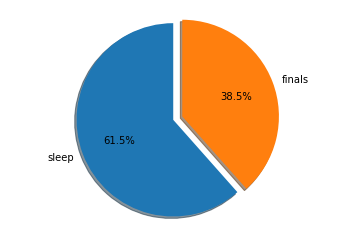

In [21]:
#figuring out percents
ab_fav_sum = a_fav_total + b_fav_total
ab_rt_sum = a_rt_total + b_rt_total

a_fav_per = (a_fav_total/ab_fav_sum)*100
a_fav_per
b_fav_per = (b_fav_total/ab_fav_sum)*100
b_fav_per

a_rt_per = (a_rt_total/ab_rt_sum)*100
a_rt_per
b_rt_per = (b_rt_total/ab_rt_sum)*100
b_rt_per

#pie charts

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [a,b]
sizes = [a_fav_per, b_fav_per]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

labels = [a,b]
sizes = [a_rt_per, b_rt_per]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#Favrites and then RT